In [13]:
from google.colab import files
uploaded = files.upload()


Saving sample_healthcare_cleaning.csv to sample_healthcare_cleaning.csv



Dataset Head:
   Patient_ID   Age  Gender  Blood_Pressure  Diabetes  Cholesterol_Level
0           1  25.0    Male           120.0       1.0              200.0
1           2  45.0  Female           130.0       0.0              190.0
2           3  50.0    Male             NaN       1.0              210.0
3           4   NaN     NaN           110.0       0.0                NaN
4           5  35.0  Female           140.0       1.0              180.0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         22 non-null     int64  
 1   Age                16 non-null     float64
 2   Gender             19 non-null     object 
 3   Blood_Pressure     16 non-null     float64
 4   Diabetes           17 non-null     float64
 5   Cholesterol_Level  17 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory

<ipython-input-16-c50d7c0f81b6>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-16-c50d7c0f81b6>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

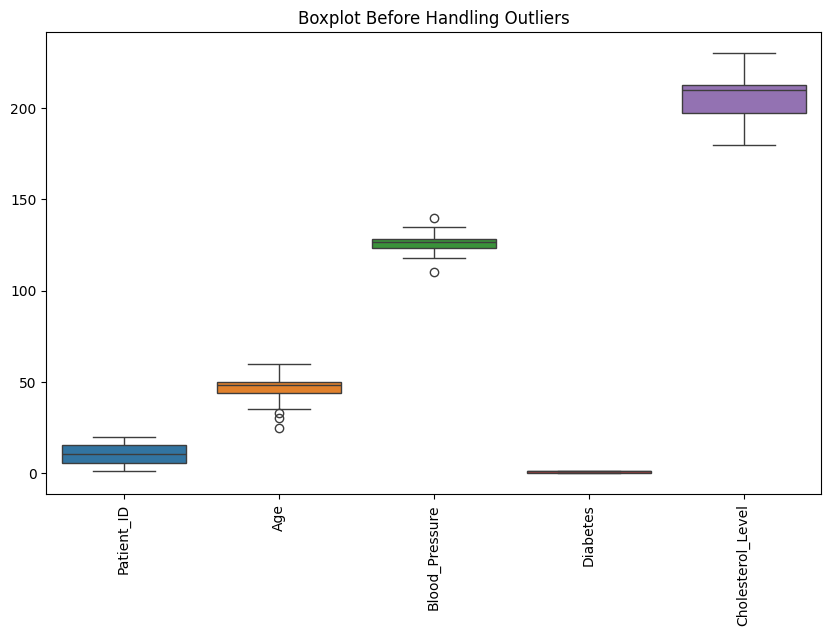


Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         20 non-null     float64
 1   Age                20 non-null     float64
 2   Gender             20 non-null     float64
 3   Blood_Pressure     20 non-null     float64
 4   Diabetes           20 non-null     float64
 5   Cholesterol_Level  20 non-null     float64
dtypes: float64(6)
memory usage: 1.1 KB
None

Missing Values After Cleaning:
Patient_ID           0
Age                  0
Gender               0
Blood_Pressure       0
Diabetes             0
Cholesterol_Level    0
dtype: int64

Cleaned dataset saved as cleaned_healthcare_data.csv


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv("sample_healthcare_cleaning.csv")  # Replace with actual file name

# Display basic information
print("\nDataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())

# Handle Missing Data
print("\nMissing Values Count:")
print(df.isna().sum())

# Fill numerical missing values with median
for col in df.select_dtypes(include=['float64', 'int64']):
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical missing values with mode
for col in df.select_dtypes(include=['object']):
    df[col].fillna(df[col].mode()[0], inplace=True)

# Detect and Handle Duplicates
duplicate_count = df.duplicated().sum()
print(f"\nDuplicate Records Found: {duplicate_count}")
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)

# Detect and Handle Outliers using Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title("Boxplot Before Handling Outliers")
plt.xticks(rotation=90)
plt.show()

# Capping outliers using IQR method
for col in df.select_dtypes(include=['float64', 'int64']):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Convert Categorical Variables to Numeric
le = LabelEncoder()
for col in df.select_dtypes(include=['object']):
    df[col] = le.fit_transform(df[col])

# Standardize or Normalize Data
scaler = MinMaxScaler()  # Use StandardScaler() if needed
df[df.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

# Data Validation
print("\nFinal Dataset Info:")
print(df.info())
print("\nMissing Values After Cleaning:")
print(df.isna().sum())

# Save cleaned dataset
df.to_csv("cleaned_healthcare_data.csv", index=False)
print("\nCleaned dataset saved as cleaned_healthcare_data.csv")
